<a href="https://colab.research.google.com/github/maren318/MAT421_Fenglin/blob/main/MAT421_ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Algebra concepts such as linear space, orthogonality, eigenvalues.
## Linear regression.

#### 1.1.1 Sets

Naturals - N = {1,2,3,4,..}

Wholes - W = N U {0}

Integers - Z = W U {-1,-2,-3,....}

Rationals - Q = { p/g : p ∊ Z , q ∊ Z \ {0}}

Irrationals - I = set of real numbers not expressible as a fraction of integers

Reals - R = Q U I

Complex Numbers - C = {a + bi: a, b ∊ R, i = sqrt(-1) }

#### 1.1.2 Vectors

In [ ]:
import numpy as np
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
'''
Determine the 𝐿1, 𝐿2, and 𝐿∞ norm of the column vector that is created by transposing the row vector that we previously specified.
Check to see if a vector's 𝐿∞ norm equals the highest value of its component parts.
'''

from numpy.linalg import norm
vector_row = np.array([[1, -5, 3, 2, 4]])
new_vector = vector_row.T
print(new_vector)
norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)
print('L_1 is: %.1f'%norm_1)
print('L_2 is: %.1f'%norm_2)
print('L_inf is: %.1f'%norm_inf)


[[ 1]
 [-5]
 [ 3]
 [ 2]
 [ 4]]
L_1 is: 15.0
L_2 is: 7.4
L_inf is: 5.0


In [ ]:
# Redefine vectors with three elements
vector_a = np.array([2, 3, 1])
vector_b = np.array([1, 4, 2])

# Vector addition
addition = vector_a + vector_b

# Scalar multiplication
scalar_multiplication = 2 * vector_a

# Angle between vectors
cos_angle = np.dot(vector_a, vector_b) / (np.linalg.norm(vector_a) * np.linalg.norm(vector_b))
angle = np.arccos(cos_angle)

# Cross product
cross_product = np.cross(vector_a, vector_b)

# Check for linear independence with a third vector
vector_c = np.array([3, 2, 5])
matrix = np.vstack([vector_a, vector_b, vector_c])
rank = np.linalg.matrix_rank(matrix)
linear_independence = rank == matrix.shape[0]

print("Vector addition : " , addition)
print("Scalar multiplication : " , scalar_multiplication)
print("Angle between vectors : " , angle)
print("Cross product : " , cross_product)
print("Check for linear independence with a third vector : " , linear_independence)



Vector addition :  [3 7 3]
Scalar multiplication :  [4 6 2]
Angle between vectors :  0.36774908225917935
Cross product :  [ 2 -3  5]
Check for linear independence with a third vector :  True


#### 1.1.3 Matrices

In [ ]:
import numpy as np

# Define matrices
matrix_a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix_b = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# Matrix multiplication
multiplication = np.dot(matrix_a, matrix_b)

# Matrix transpose
transpose = matrix_a.T

# Identity matrix (of size 3)
identity = np.eye(3)

# Inverse matrix (for a non-singular square matrix)
non_singular_matrix = np.array([[1, 2, 3], [0, 1, 4], [5, 6, 0]])
inverse = np.linalg.inv(non_singular_matrix)

# Check for ill-conditioned matrix (condition number)
condition_number = np.linalg.cond(matrix_a)
ill_conditioned = condition_number > 1e+15

# Rank of a matrix
rank = np.linalg.matrix_rank(matrix_a)

# Augmented matrix (example with matrix_a and identity)
augmented_matrix = np.hstack([matrix_a, identity])

# Printing the results with explanations
print("Matrix multiplication result:")
print(multiplication)
print("\nTranspose of the matrix:")
print(transpose)
print("\n3x3 identity matrix:")
print(identity)
print("\nInverse of the non-singular matrix:")
print(inverse)
print("\nIs the matrix ill-conditioned (extremely large condition number):", ill_conditioned)
print("\nRank of the matrix:", rank)
print("\nAugmented matrix:")
print(augmented_matrix)


Matrix multiplication result:
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]

Transpose of the matrix:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

3x3 identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Inverse of the non-singular matrix:
[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]

Is the matrix ill-conditioned (extremely large condition number): True

Rank of the matrix: 2

Augmented matrix:
[[1. 2. 3. 1. 0. 0.]
 [4. 5. 6. 0. 1. 0.]
 [7. 8. 9. 0. 0. 1.]]


#### Solve Systems of Linear Equations in Python

In [ ]:
import numpy as np

A = np.array([[4, 3, -5],
              [-2, -4, 5],
              [8, 8, 0]])
y = np.array([2, 5, -3])

x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


#### 1.2 Eigenvalues and Eigenvectors in Python

In code :

The power_iteration function approximates an eigenvector of a matrix using the power method.

The qr_method function computes eigenvalues and eigenvectors using the QR method.

Both methods are applied to the matrix A = [[2, -1, 0], [-1, 2, -1], [0, -1, 2]].

In [ ]:
import numpy as np
from scipy.linalg import qr

def power_iteration(A, num_simulations: int):
    # Randomly choose a vector to start
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        # Calculate the matrix-by-vector product
        b_k1 = np.dot(A, b_k)

        # Calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        # Re normalize the vector
        b_k = b_k1 / b_k1_norm

    return b_k

def qr_method(A, num_simulations: int):
    n = A.shape[0]
    Ak = np.copy(A)
    Q_total = np.eye(n)

    for _ in range(num_simulations):
        Q, R = qr(Ak)
        Ak = R @ Q
        Q_total = Q_total @ Q

    eigenvalues = np.diag(Ak)
    return eigenvalues, Q_total

# Define a matrix
A = np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]])

# Power method to approximate an eigenvector
num_simulations = 100
eigenvector_approx = power_iteration(A, num_simulations)

# QR Method for eigenvalues and eigenvectors
eigenvalues_qr, eigenvectors_qr = qr_method(A, num_simulations)

print("Approximated eigenvector using Power Method:")
print(eigenvector_approx)
print("\nEigenvalues using QR Method:")
print(eigenvalues_qr)
print("\nEigenvectors using QR Method:")
print(eigenvectors_qr)


Approximated eigenvector using Power Method:
[-0.5         0.70710678 -0.5       ]

Eigenvalues using QR Method:
[3.41421356 2.         0.58578644]

Eigenvectors using QR Method:
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01  2.11156240e-16  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


In [ ]:
import numpy as np
from scipy.linalg import orth

# Define a square matrix
matrix = np.array([[4, 2], [2, 3]])

# Linear space (eigenvectors)
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# Orthogonality (orthogonal basis of the column space)
# For simplicity, using scipy's orth function on a 2x2 matrix
orthogonal_basis = orth(matrix)

# Displaying the results
print("Eigenvalues of the matrix:")
print(eigenvalues)
print("\nEigenvectors of the matrix:")
print(eigenvectors)
print("\nOrthogonal basis of the column space of the matrix:")
print(orthogonal_basis)



Eigenvalues of the matrix:
[5.56155281 1.43844719]

Eigenvectors of the matrix:
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]

Orthogonal basis of the column space of the matrix:
[[-0.78820544 -0.61541221]
 [-0.61541221  0.78820544]]


#### 1.3 Least Squares Regression

Least Squares Regression is a method for estimating the coefficients of a linear model. It minimizes the sum of the squares of the residuals, which are the differences between observed and predicted values. This technique is widely used in linear regression for fitting a model to data.

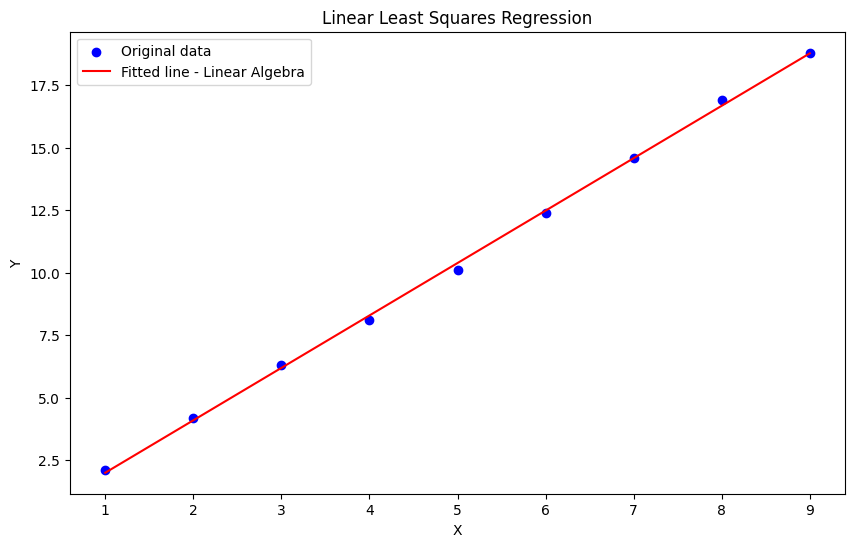

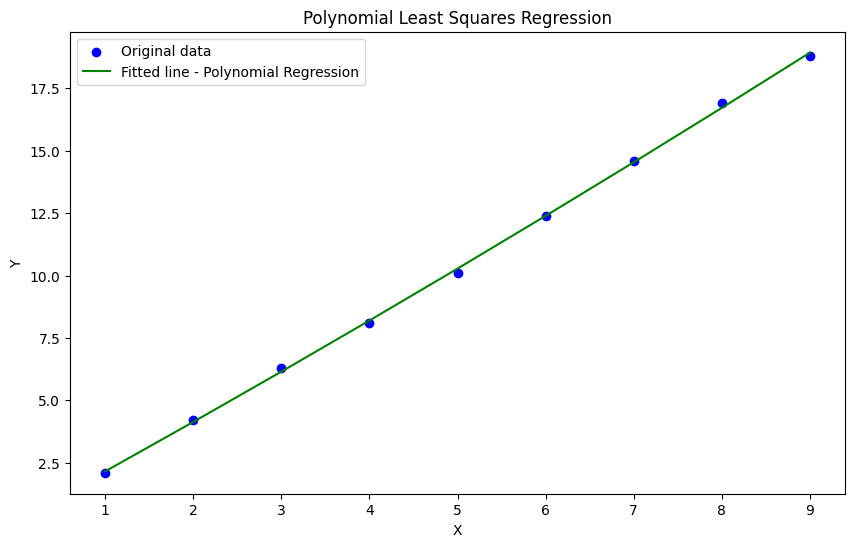

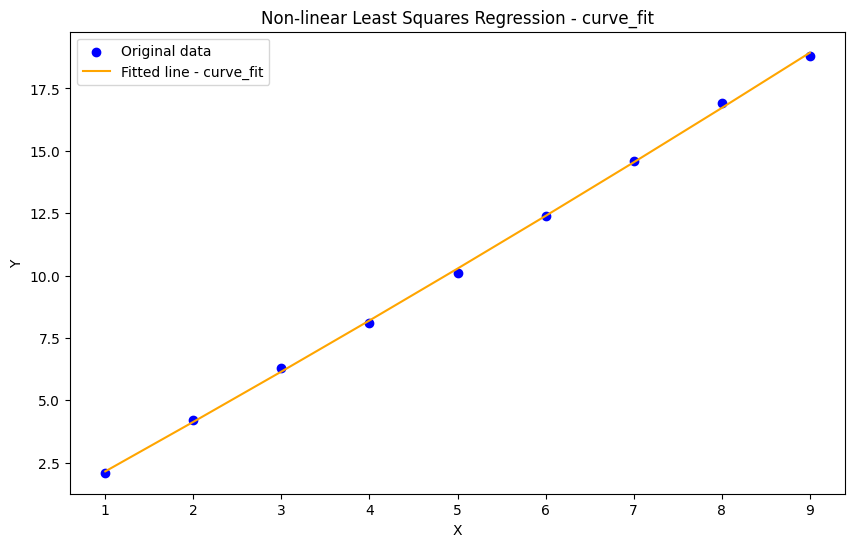

Coefficients from Linear Algebraic Derivation (Least Squares Regression):
Slope (m): 2.0966666666666667
Intercept (c): -123.88764334456897

Coefficients from Multivariable Calculus Derivation (Normal Equation):
Theta: [ 2.09666667 -0.09444444]

Coefficients from Polynomial Regression:
Polynomial Coefficients (z): [0.01645022 1.9321645  0.20714286]

Coefficients from Non-linear Regression using scipy.optimize.curve_fit:
Non-linear Function Coefficients (a, b, c): (124.08780549956352, 0.015619760521751508, -123.88764334456897)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Summarizing Least Squares Regression
summary = """
Least Squares Regression is a method for estimating the coefficients of a linear model.
It minimizes the sum of the squares of the residuals, which are the differences between
observed and predicted values. This technique is widely used in linear regression for
fitting a model to data.
"""

# Data for demonstration
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2.1, 4.2, 6.3, 8.1, 10.1, 12.4, 14.6, 16.9, 18.8])

# Least Squares Regression Derivation (Linear Algebra)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Plotting Linear Fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, m*x + c, 'r', label='Fitted line - Linear Algebra')
plt.title('Linear Least Squares Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Least Squares Regression Derivation (Multivariable Calculus)
# Using the normal equation: (X^T X)^(-1) X^T y
X = np.vstack([x, np.ones(len(x))]).T
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Non-linear Least Squares Regression - Polynomial Regression
# Fitting a polynomial of degree 2 (quadratic)
z = np.polyfit(x, y, 2)
p = np.poly1d(z)

# Plotting Polynomial Fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, p(x), 'g', label='Fitted line - Polynomial Regression')
plt.title('Polynomial Least Squares Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Using scipy's optimization.curve_fit for a custom non-linear function
# Defining a non-linear function (e.g., exponential)
def func(x, a, b, c):
    return a * np.exp(b * x) + c

# Curve fitting
popt, pcov = curve_fit(func, x, y)
a, b, c = popt

# Plotting Non-linear Fit using curve_fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, func(x, *popt), 'orange', label='Fitted line - curve_fit')
plt.title('Non-linear Least Squares Regression - curve_fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Printing the coefficients with explanations

print("Coefficients from Linear Algebraic Derivation (Least Squares Regression):")
print("Slope (m):", m)
print("Intercept (c):", c)

print("\nCoefficients from Multivariable Calculus Derivation (Normal Equation):")
print("Theta:", theta)

print("\nCoefficients from Polynomial Regression:")
print("Polynomial Coefficients (z):", z)

print("\nCoefficients from Non-linear Regression using scipy.optimize.curve_fit:")
print("Non-linear Function Coefficients (a, b, c):", (a, b, c))





<ipython-input-17-47101a915929>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


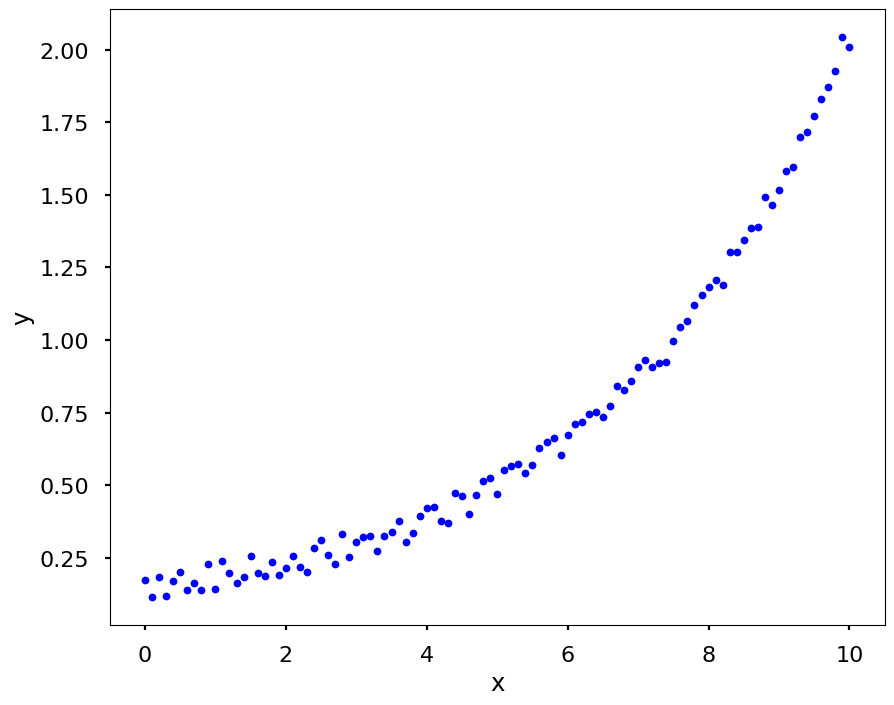

alpha=0.1337837993389289, beta=0.2698464435672698


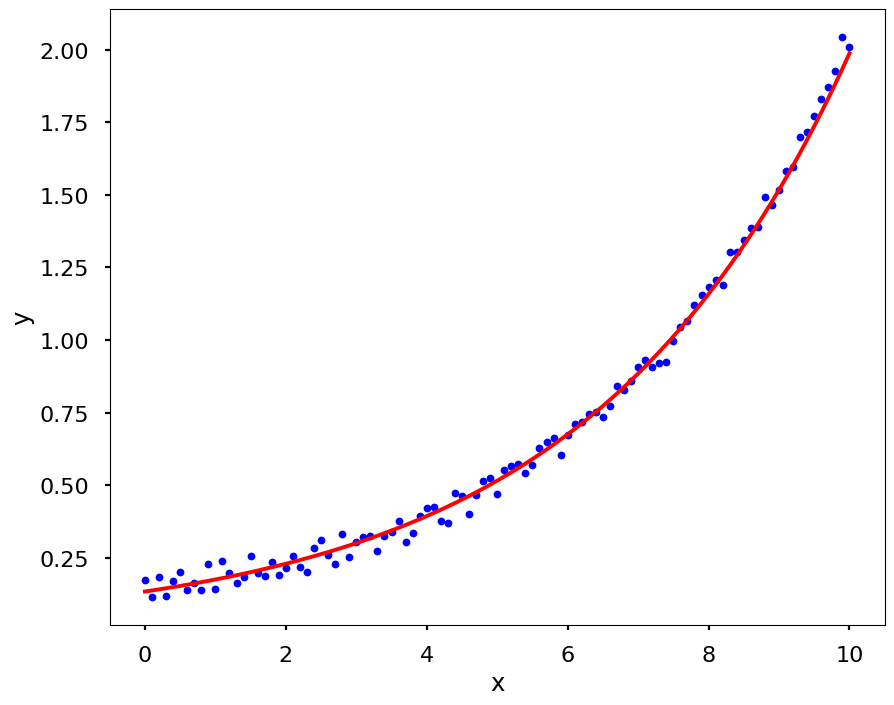

In [ ]:
#Least Square Regression for Nonlinear Functions
#Log tricks for exponential functions¶
#we will generate data using 𝛼=0.1 and 𝛽=0.3
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Let’s fit the data after we applied the log trick.
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

